In [49]:
# Importing necessary libraries
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn import datasets
from sklearn import metrics
from sklearn import tree
import matplotlib.pyplot as plt
from PIL import Image

import seaborn as sns
import random

In [50]:
pwd = os.getcwd()

In [51]:
dataset_path = r"c:\Users\REBU\Downloads\archive\UTKFace"

In [52]:
# Firstly, our dataset has .chip extension at the end which we want to get rid of

# Iterate over all files in the directory
for filename in os.listdir(dataset_path):
    # Check if the filename contains ".chip"
    if ".chip" in filename:
        # Construct the old and new file paths
        old_filepath = os.path.join(dataset_path, filename)
        new_filename = filename.replace(".chip", "")  # Remove ".chip" from the filename
        new_filepath = os.path.join(dataset_path, new_filename)
        
        # Rename the file
        os.rename(old_filepath, new_filepath)
        
        # Print the renaming operation
        print(f"Renamed {old_filepath} to {new_filepath}")

In [53]:
# Then we got ".jpg.jpg" as extensions, remove one .jpg

for filename in os.listdir(dataset_path):
    new_filename = filename.replace(".jpg.jpg", ".jpg")
    if new_filename != filename:
        old_filepath = os.path.join(dataset_path, filename)
        new_filepath = os.path.join(dataset_path, new_filename)
        os.rename(old_filepath, new_filepath)
        print(f"Renamed {old_filepath} to {new_filepath}")

In [54]:
# Corrected filenames

filenames = os.listdir(dataset_path)
print(filenames[0])

100_0_0_20170112213500903.jpg


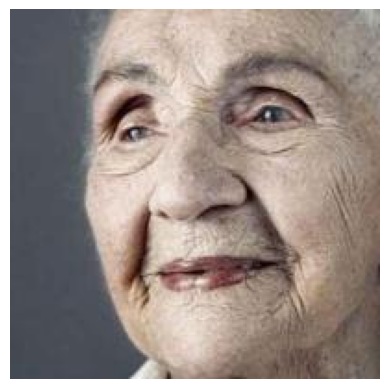

In [55]:
# Taking a look at our image

image_path = os.path.join(dataset_path, filenames[3])
image = Image.open(image_path)

plt.imshow(image)
plt.axis("off")
plt.show()

In [56]:
# Our files have age and gender information in the filenames, extracting the info

gender_list = []
age_list = []
image_paths = []

for filename in os.listdir(dataset_path):
    image_path = os.path.join(dataset_path, filename)
    temp = filename.split("_")
    gender_list.append(int(temp[1]))
    age_list.append(int(temp[0]))
    image_paths.append(image_path)

In [57]:
# Our files have age and gender information in the filenames, extracting the info

gender_list = []
age_list = []
image_paths = []

for filename in os.listdir(dataset_path):
    image_path = os.path.join(dataset_path, filename)
    temp = filename.split("_")
    gender_list.append(int(temp[1]))
    age_list.append(int(temp[0]))
    image_paths.append(image_path)

In [58]:
df = pd.DataFrame()
df['image'], df['gender_index'], df['age'] = image_paths, gender_list, age_list
df.head()

,image,gender_index,age
0,c:\Users\REBU\Downloads\archive\UTKFace\100_0_...,0,100
1,c:\Users\REBU\Downloads\archive\UTKFace\100_0_...,0,100
2,c:\Users\REBU\Downloads\archive\UTKFace\100_1_...,1,100
3,c:\Users\REBU\Downloads\archive\UTKFace\100_1_...,1,100
4,c:\Users\REBU\Downloads\archive\UTKFace\100_1_...,1,100


In [59]:
gender_dict = df['gender_index'].replace({0:"Male",1:"Female"})
df["gender"] = df['gender_index'].replace({0:"Male",1:"Female"})

In [60]:
df.to_csv("new_dataset.csv", index=False)

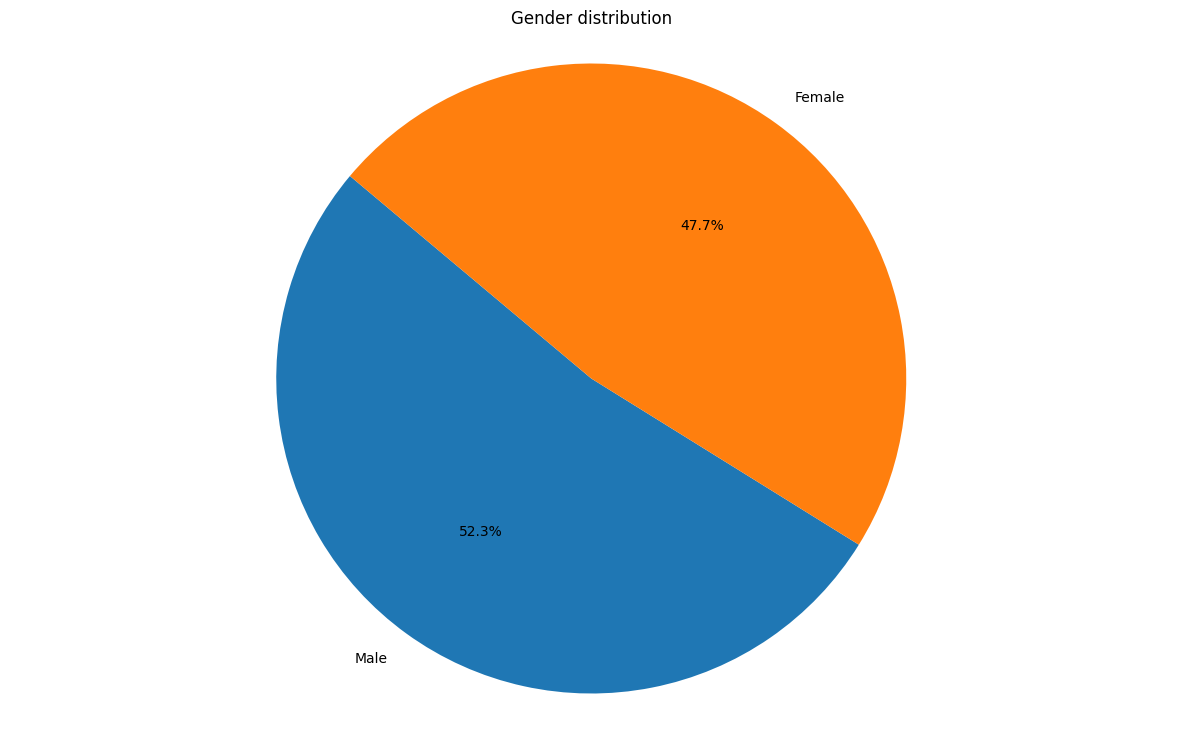

In [61]:
# View gender information

genders = df['gender'].value_counts()

plt.figure(figsize=(15, 9))
plt.pie(genders, labels=genders.index, autopct='%1.1f%%', startangle=140)
plt.title("Gender distribution")
plt.axis("equal")
plt.plot();


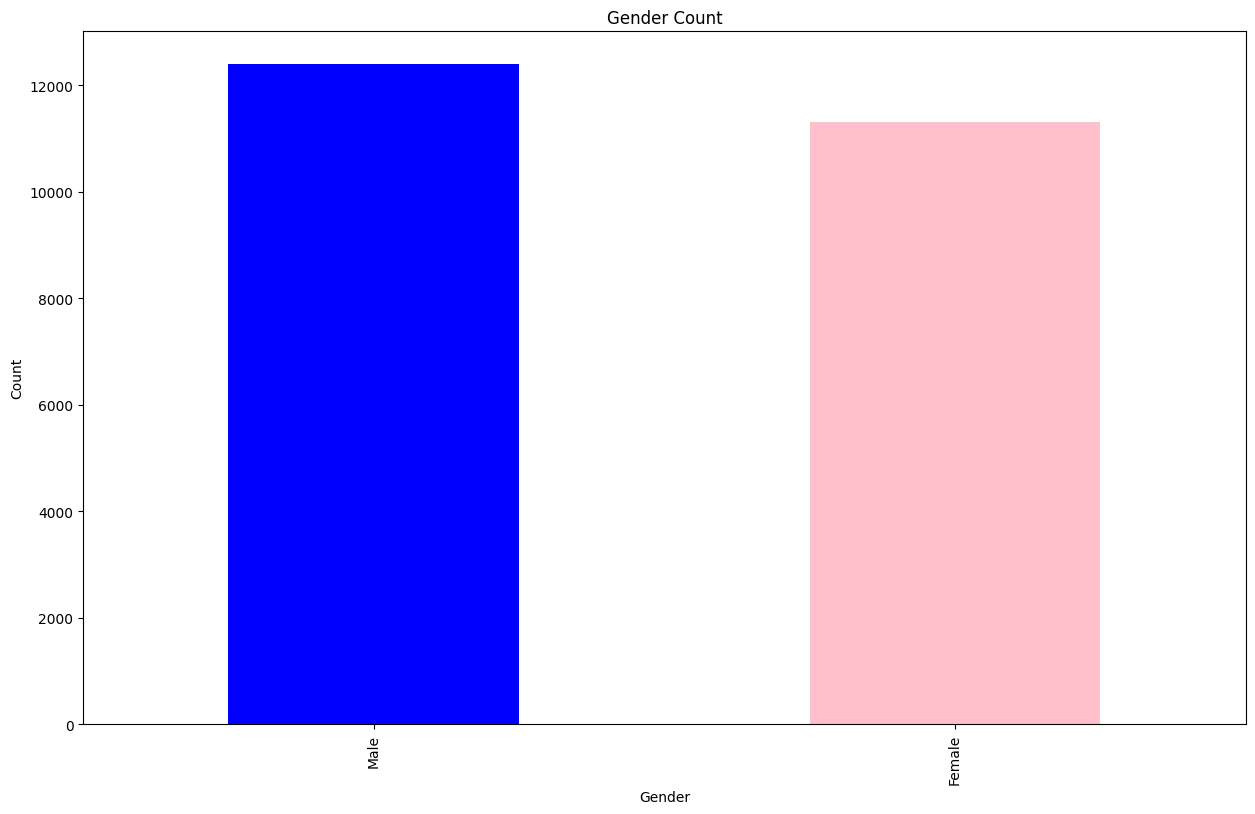

In [62]:
plt.figure(figsize=(15,9))
genders.plot(kind="bar", color=["blue", 'pink'])
plt.title("Gender Count")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.plot();

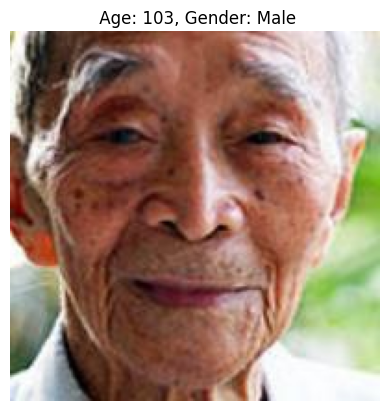

In [63]:
img = Image.open(df['image'][13])
plt.title(f' Age: {df.age[13]}, Gender: {df.gender[13]}')
plt.axis('off')
plt.imshow(img);

In [64]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, Input
from keras.models import Model, Sequential
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from keras.applications import InceptionV3
from keras.callbacks import TensorBoard
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import random
import os
from keras import regularizers

In [65]:
pwd = os.getcwd()

In [66]:
dataset_path = pwd + "\\new_dataset.csv"

In [67]:
df = pd.read_csv(dataset_path)
df.head()

,image,gender_index,age,gender
0,c:\Users\REBU\Downloads\archive\UTKFace\100_0_...,0,100,Male
1,c:\Users\REBU\Downloads\archive\UTKFace\100_0_...,0,100,Male
2,c:\Users\REBU\Downloads\archive\UTKFace\100_1_...,1,100,Female
3,c:\Users\REBU\Downloads\archive\UTKFace\100_1_...,1,100,Female
4,c:\Users\REBU\Downloads\archive\UTKFace\100_1_...,1,100,Female


In [68]:
df.head()

,image,gender_index,age,gender
0,c:\Users\REBU\Downloads\archive\UTKFace\100_0_...,0,100,Male
1,c:\Users\REBU\Downloads\archive\UTKFace\100_0_...,0,100,Male
2,c:\Users\REBU\Downloads\archive\UTKFace\100_1_...,1,100,Female
3,c:\Users\REBU\Downloads\archive\UTKFace\100_1_...,1,100,Female
4,c:\Users\REBU\Downloads\archive\UTKFace\100_1_...,1,100,Female


In [69]:
# Function to extract features from images (replace this with your feature extraction method)
def extract_features(image_path):
    # Your feature extraction code here
    return np.random.rand(100)  # Dummy feature vector of size 100

In [70]:
# Apply feature extraction function to each row in the DataFrame
df['features'] = df['image'].apply(extract_features)

In [71]:
train_df, test_df = train_test_split(df, test_size=0.15, random_state=42)
train_df, val_df = train_test_split(df, test_size=0.15, random_state=42)

In [72]:
train_df.head()

,image,gender_index,age,gender,features
5045,c:\Users\REBU\Downloads\archive\UTKFace\25_0_0...,0,25,Male,"[0.4824925779379656, 0.9544670607693141, 0.624..."
6662,c:\Users\REBU\Downloads\archive\UTKFace\26_0_4...,0,26,Male,"[0.679391775243605, 0.010478954224859116, 0.95..."
6399,c:\Users\REBU\Downloads\archive\UTKFace\26_0_3...,0,26,Male,"[0.40032130420376577, 0.26583351728281235, 0.2..."
8058,c:\Users\REBU\Downloads\archive\UTKFace\27_0_1...,0,27,Male,"[0.12714202594907598, 0.9633466591943508, 0.91..."
13570,c:\Users\REBU\Downloads\archive\UTKFace\35_1_1...,1,35,Female,"[0.16999243144860077, 0.010952966712897916, 0...."


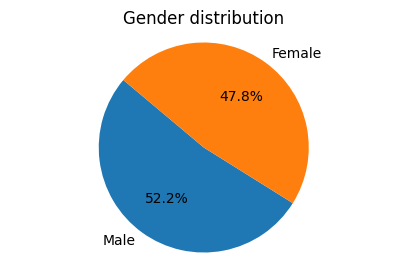

In [73]:
genders = train_df['gender'].value_counts()

plt.figure(figsize=(5,3))
plt.pie(genders, labels=genders.index, autopct='%1.1f%%', startangle=140)
plt.title("Gender distribution")
plt.axis("equal")
plt.plot();

In [74]:
test_df.head()

,image,gender_index,age,gender,features
17525,c:\Users\REBU\Downloads\archive\UTKFace\49_1_0...,1,49,Female,"[0.5859232620630366, 0.8535420865061623, 0.555..."
1147,c:\Users\REBU\Downloads\archive\UTKFace\17_1_0...,1,17,Female,"[0.44406298238096875, 0.316474159001066, 0.031..."
1190,c:\Users\REBU\Downloads\archive\UTKFace\17_1_4...,1,17,Female,"[0.6636421122408727, 0.031230092534217824, 0.5..."
9731,c:\Users\REBU\Downloads\archive\UTKFace\29_0_4...,0,29,Male,"[0.16625643646306199, 0.26337492804056595, 0.4..."
7387,c:\Users\REBU\Downloads\archive\UTKFace\26_1_2...,1,26,Female,"[0.9969971133853957, 0.26622318189108696, 0.56..."


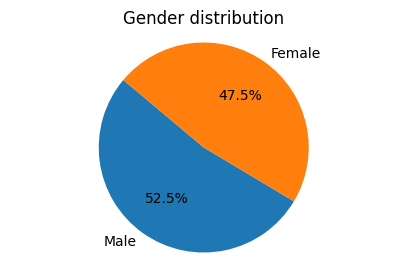

In [75]:
genders = test_df['gender'].value_counts()

plt.figure(figsize=(5,3))
plt.pie(genders, labels=genders.index, autopct='%1.1f%%', startangle=140)
plt.title("Gender distribution")
plt.axis("equal")
plt.plot();

In [76]:
test_df.head()

,image,gender_index,age,gender,features
17525,c:\Users\REBU\Downloads\archive\UTKFace\49_1_0...,1,49,Female,"[0.5859232620630366, 0.8535420865061623, 0.555..."
1147,c:\Users\REBU\Downloads\archive\UTKFace\17_1_0...,1,17,Female,"[0.44406298238096875, 0.316474159001066, 0.031..."
1190,c:\Users\REBU\Downloads\archive\UTKFace\17_1_4...,1,17,Female,"[0.6636421122408727, 0.031230092534217824, 0.5..."
9731,c:\Users\REBU\Downloads\archive\UTKFace\29_0_4...,0,29,Male,"[0.16625643646306199, 0.26337492804056595, 0.4..."
7387,c:\Users\REBU\Downloads\archive\UTKFace\26_1_2...,1,26,Female,"[0.9969971133853957, 0.26622318189108696, 0.56..."


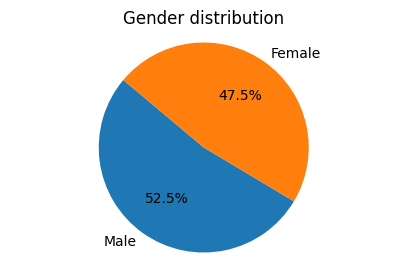

In [77]:
genders = test_df['gender'].value_counts()

plt.figure(figsize=(5,3))
plt.pie(genders, labels=genders.index, autopct='%1.1f%%', startangle=140)
plt.title("Gender distribution")
plt.axis("equal")
plt.plot();

In [78]:
val_df.head()

,image,gender_index,age,gender,features
17525,c:\Users\REBU\Downloads\archive\UTKFace\49_1_0...,1,49,Female,"[0.5859232620630366, 0.8535420865061623, 0.555..."
1147,c:\Users\REBU\Downloads\archive\UTKFace\17_1_0...,1,17,Female,"[0.44406298238096875, 0.316474159001066, 0.031..."
1190,c:\Users\REBU\Downloads\archive\UTKFace\17_1_4...,1,17,Female,"[0.6636421122408727, 0.031230092534217824, 0.5..."
9731,c:\Users\REBU\Downloads\archive\UTKFace\29_0_4...,0,29,Male,"[0.16625643646306199, 0.26337492804056595, 0.4..."
7387,c:\Users\REBU\Downloads\archive\UTKFace\26_1_2...,1,26,Female,"[0.9969971133853957, 0.26622318189108696, 0.56..."


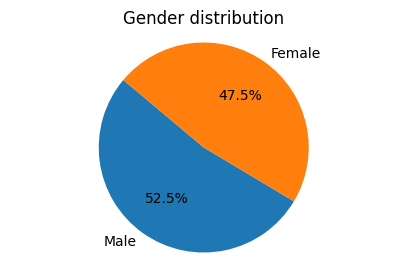

In [79]:
genders = val_df['gender'].value_counts()

plt.figure(figsize=(5, 3))
plt.pie(genders, labels=genders.index, autopct='%1.1f%%', startangle=140)
plt.title("Gender distribution")
plt.axis("equal")
plt.plot();

In [80]:
datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    horizontal_flip=True,
    vertical_flip=True,
    rotation_range=20,
)

In [81]:
batch_size = 32
img_height = 224
img_width = 224

In [82]:
train_gen = datagen.flow_from_dataframe(
    dataframe=train_df,
    x_col='image',
    y_col='gender_index',
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='raw',  # Use 'raw' to handle integer labels
    shuffle=True  # You can shuffle the training data
)

Found 20151 validated image filenames.


ValueError: num must be an integer with 1 <= num <= 9, not 10

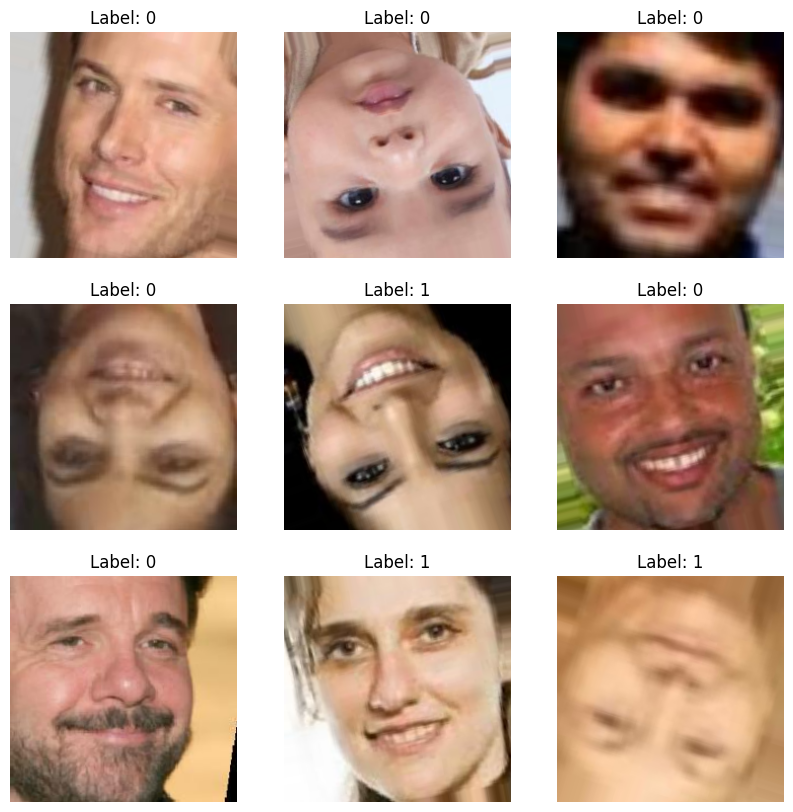

In [83]:
import matplotlib.pyplot as plt

# Retrieve a batch of data and labels from the generator
batch_images, batch_labels = next(train_gen)

# Plot the images
plt.figure(figsize=(10, 10))
for i in range(len(batch_images)):
    plt.subplot(3, 3, i + 1)
    plt.imshow(batch_images[i])
    plt.title(f"Label: {batch_labels[i]}")
    plt.axis("off")
plt.show()


In [84]:
val_gen = datagen.flow_from_dataframe(
    dataframe=val_df,
    x_col='image',
    y_col='gender_index',
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='raw',  # Use 'raw' to handle integer labels
    shuffle=False  # No need to shuffle validation data
)

Found 3557 validated image filenames.


In [85]:
# Extract features and labels
X_train, y_train = next(train_gen)
X_val, y_val = next(val_gen)

In [86]:
# Initialize the decision tree classifier
clf = DecisionTreeClassifier()

In [87]:
# Train the classifier
clf.fit(X_train.reshape(X_train.shape[0], -1), y_train)  # Flattening image data

DecisionTreeClassifier()

In [88]:
# Predictions
train_preds = clf.predict(X_train.reshape(X_train.shape[0], -1))
val_preds = clf.predict(X_val.reshape(X_val.shape[0], -1))

In [89]:
# Print the shapes of the input data
print("X_train shape:", X_train.shape)
print("X_val shape:", X_val.shape)
print("y_train shape:", y_train.shape)
print("y_val shape:", y_val.shape)

X_train shape: (32, 224, 224, 3)
X_val shape: (32, 224, 224, 3)
y_train shape: (32,)
y_val shape: (32,)


In [90]:
# Evaluate performance
train_accuracy = accuracy_score(y_train, train_preds)
val_accuracy = accuracy_score(y_val, val_preds)
print("Training Accuracy:", train_accuracy)
print("Validation Accuracy:", val_accuracy)

Training Accuracy: 1.0
Validation Accuracy: 0.53125


In [91]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, classification_report

precision = precision_score(y_val, val_preds)
recall = recall_score(y_val, val_preds)
f1 = f1_score(y_val, val_preds)
conf_matrix = confusion_matrix(y_val, val_preds)
class_report = classification_report(y_val, val_preds)

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)


Precision: 0.6111111111111112
Recall: 0.5789473684210527
F1 Score: 0.5945945945945946
Confusion Matrix:
 [[ 6  7]
 [ 8 11]]
Classification Report:
               precision    recall  f1-score   support

           0       0.43      0.46      0.44        13
           1       0.61      0.58      0.59        19

    accuracy                           0.53        32
   macro avg       0.52      0.52      0.52        32
weighted avg       0.54      0.53      0.53        32



In [92]:
import pickle
# Save the model to a file
with open('decision_model.pkl', 'wb') as f:
    pickle.dump(clf, f)